In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('decisionTree_data.csv')
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
x = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Training and Testing Decision Tree Algorithm
Once we split the data, the next step is to scale our dataset so the extreme values will not have too much effect on the prediction of our model.

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#providing the inputs for the scaling purpose
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Notice that we are only scaling the input values, not the output ones. Now, our data is ready for training the model using a decision tree algorithm.

In [7]:
from sklearn.tree import DecisionTreeClassifier
#entropy means information gain
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#providing the training dataset
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
y_pred = classifier.predict(x_test)

In [9]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.91

# Visualizing Decision Tree Using SKlearn module in AWS Jupiter Notebook

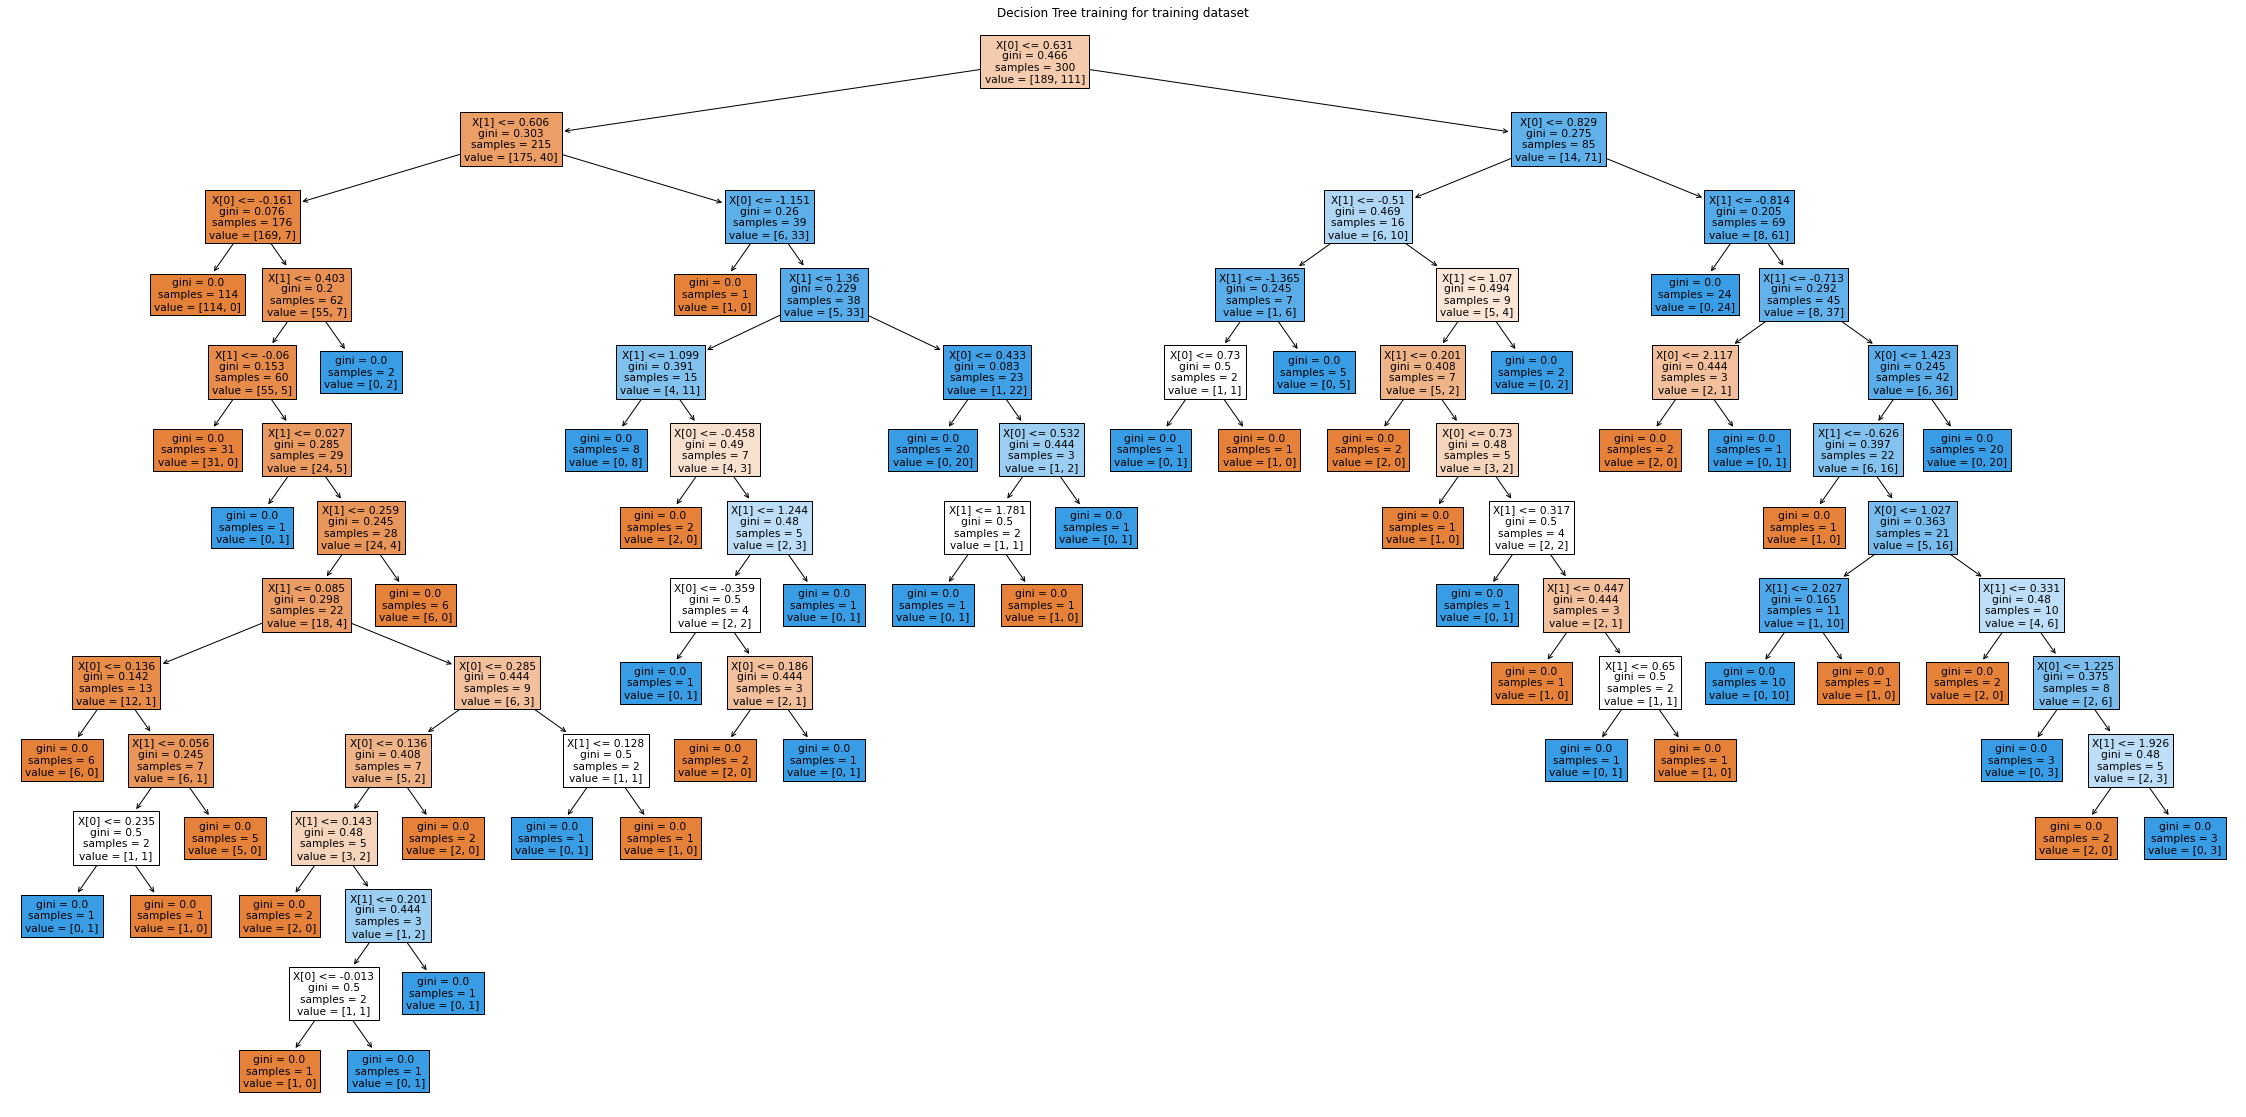

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
#output size of Decision Tree
plt.figure(figsize = (40, 20))
#providing the training dataset
clf = clf.fit(x_train, y_train)
plot_tree(clf, filled = True)
plt.title('Decision Tree training for training dataset')
plt.show()

Similarly, we can also visualize the Decision Tree formed by the testing dataset.

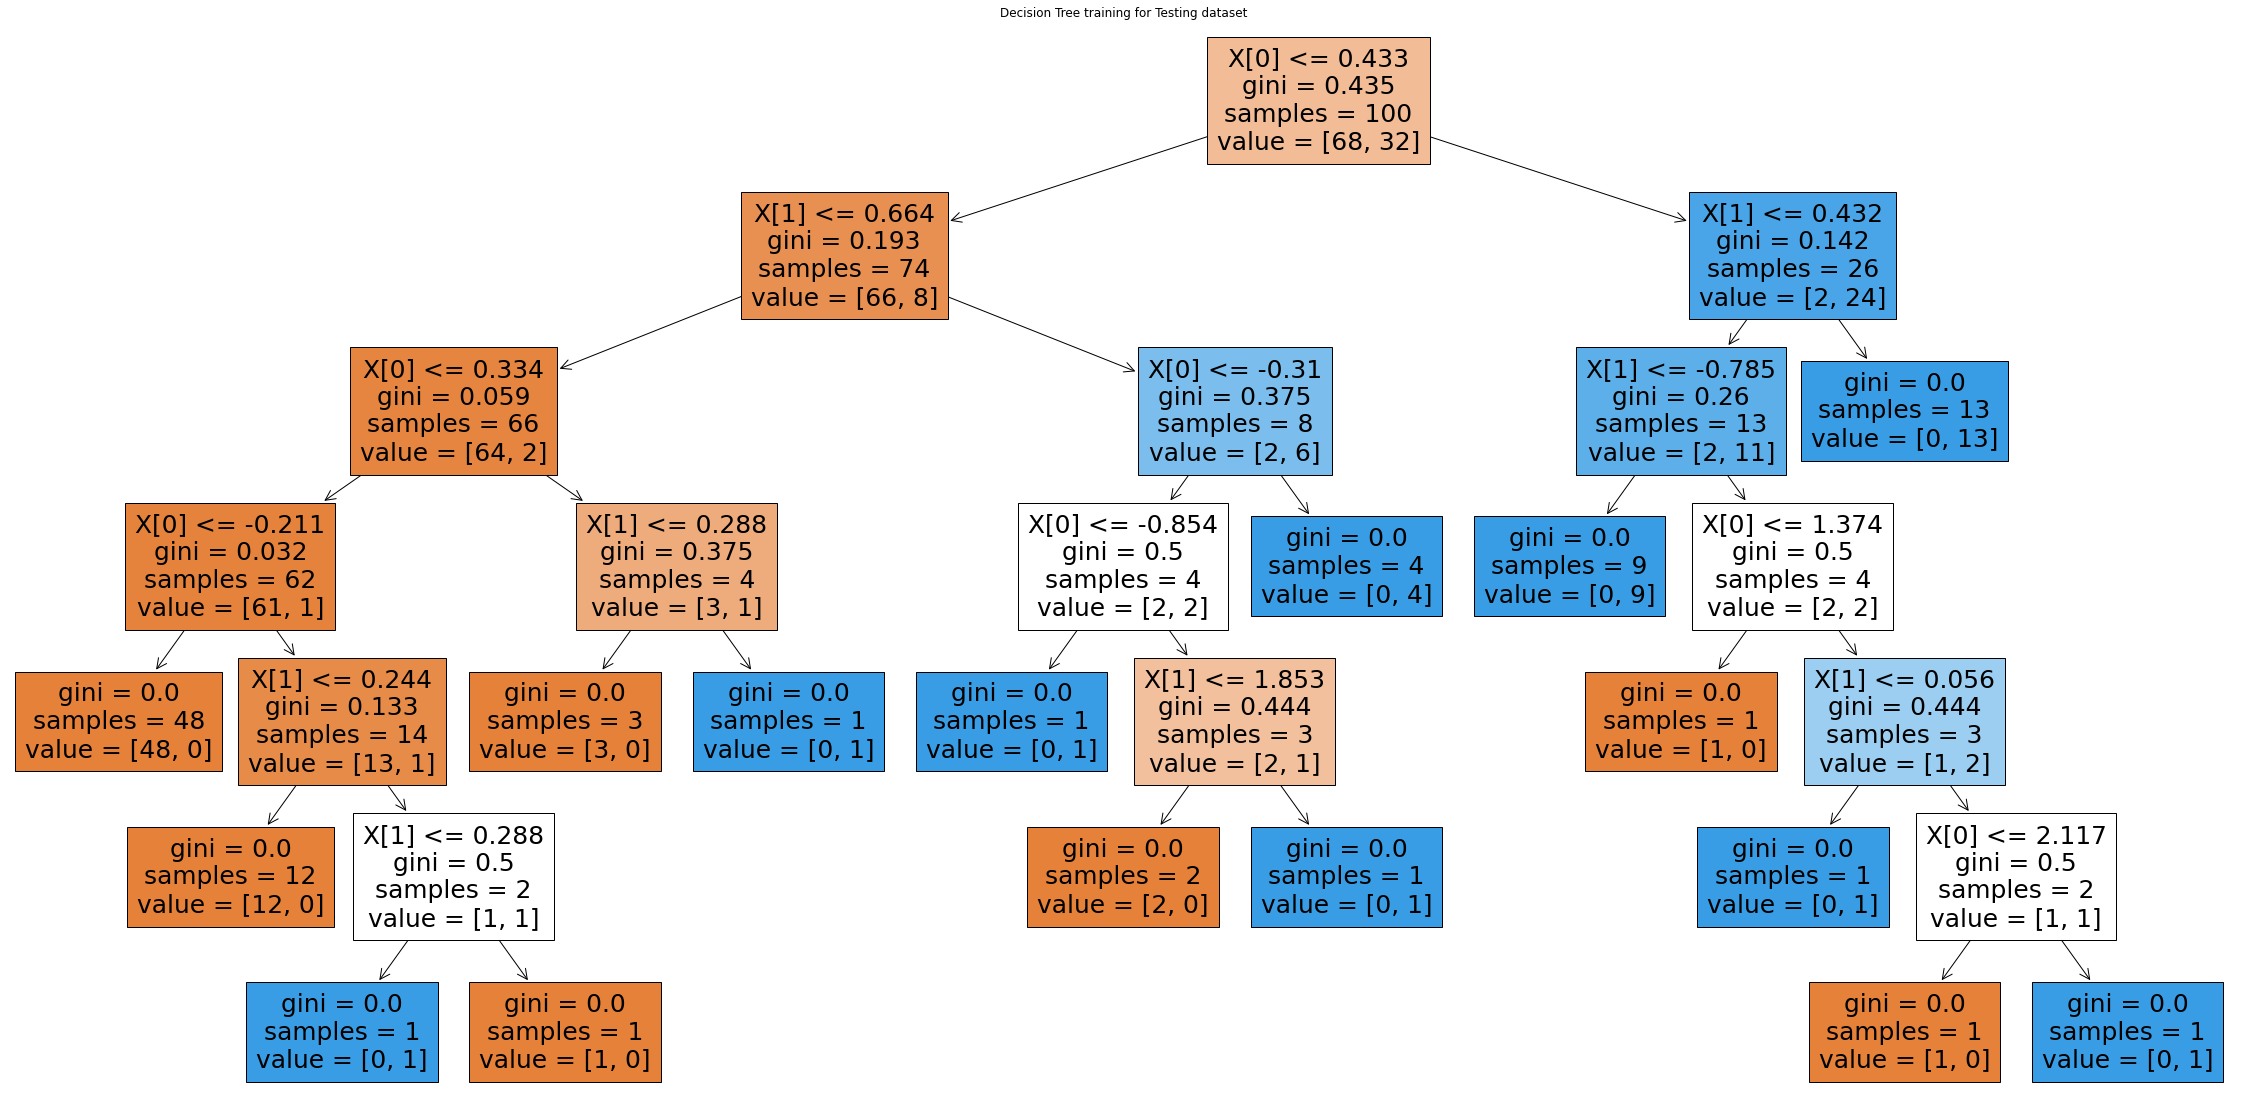

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
plt.figure(figsize = (40, 20))
clf = clf.fit(x_test, y_test)
plot_tree(clf, filled = True)
plt.title('Decision Tree training for Testing dataset')
plt.show()

# Visualizing Decision Tree through text representation

In [18]:
from sklearn import tree
#text based tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.43
|   |--- feature_1 <= 0.66
|   |   |--- feature_0 <= 0.33
|   |   |   |--- feature_0 <= -0.21
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.21
|   |   |   |   |--- feature_1 <= 0.24
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.24
|   |   |   |   |   |--- feature_1 <= 0.29
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.29
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.33
|   |   |   |--- feature_1 <= 0.29
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  0.29
|   |   |   |   |--- class: 1
|   |--- feature_1 >  0.66
|   |   |--- feature_0 <= -0.31
|   |   |   |--- feature_0 <= -0.85
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.85
|   |   |   |   |--- feature_1 <= 1.85
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  1.85
|   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  -0.31
|   |   |   |--- class: 1
|--- feature_0 > 

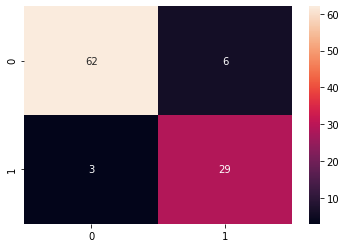

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#making the confusion matrix
sns.heatmap(cm, annot = True)
plt.savefig('confusion.png')

# Evaluating Decision Tree for binary classification using confusion matrix
The model we trained in the previous section was trained on a binary dataset because there were only two output classes. Let us now evaluate the model using a confusion matrix.

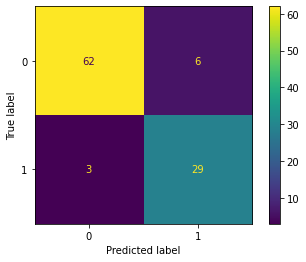

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels = classifier.classes_)
#plotting with labels
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

# Confusion Matrix Values
Print the True Positive, True Negative, False Positive, and False Negative values by using python code.

In [23]:
# defining a function which takes acutal and pred values
def confusion_values(y_actual, y_pred):

    # initializing the values with zero value
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # iterating through the values
    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    # printing the values
    print("True Positive: ", TP)
    print("False Positive:", FP)
    print("True Negative: ", TN)
    print("False Negative: ", FN)

# calling the function
confusion_values(y_test, y_pred)

True Positive:  29
False Positive: 6
True Negative:  62
False Negative:  3


In [24]:
# importing the required module and methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy-score: {accuracy_score(y_test, y_pred):.3f}')
print(f'Precision-score: {precision_score(y_test, y_pred):.3f}')
print(f'Recall-score: {recall_score(y_test, y_pred):.3f}')
print(f'F1-score: {f1_score(y_test, y_pred):.3f}')

Accuracy-score: 0.910
Precision-score: 0.829
Recall-score: 0.906
F1-score: 0.866


# Evaluating Decision tree for multiclass classification using confusion matrix
A confusion matrix is not only used to evaluate binary class classification problems. In fact, it is also used in multi-class classification as well. In multi-class classification, rows/columns will equal the number of output classes. For example, we have the following sample data containing three output classes. We will first train our decision tree model by providing this dataset and then evaluate using a confusion matrix.

In [25]:
# importing the required modules
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset using pandas module
dataset = pd.read_csv('MultiClass_sample.csv')

# splitting the dataset into input and output datasets
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer=DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)
y_pred= classifer.predict(X_test)


FileNotFoundError: [Errno 2] No such file or directory: 'MultiClass_sample.csv'

# Lose functions of the Decision Tree Algorithm

In [26]:
from sklearn.metrics import hamming_loss, hinge_loss, log_loss, cohen_kappa_score
#printing the loss function
print(f'Log Loss: {log_loss(y_test, y_pred):.3f}')
print(f'Cohen Kappa: {cohen_kappa_score(y_test, y_pred):.3f}')
print(f'Hinge Loss: {hinge_loss(y_test, y_pred):.3f}')
print(f'Hamming Loss: {hamming_loss(y_test, y_pred):.3f}')

Log Loss: 3.109
Cohen Kappa: 0.798
Hinge Loss: 0.770
Hamming Loss: 0.090
